In [103]:
import pandas as pd
data = pd.read_csv('UK_Energy_Usage_2024_with_Weather.csv')
print(data.head())
print(data.info())

          timestamp  region  temperature_C  energy_usage_kWh  humidity  \
0  01/01/2024 00:00  London          -4.01            524.06      68.4   
1  01/01/2024 01:00  London          -3.81            528.53      31.5   
2  01/01/2024 02:00  London          -3.08            536.06      46.5   
3  01/01/2024 03:00  London          -3.56            567.08      43.4   
4  01/01/2024 04:00  London          -2.56            545.50      74.2   

  weather_condition  
0             Rainy  
1             Sunny  
2             Rainy  
3             Rainy  
4             Windy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70272 entries, 0 to 70271
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          70272 non-null  object 
 1   region             70272 non-null  object 
 2   temperature_C      70272 non-null  float64
 3   energy_usage_kWh   70272 non-null  float64
 4   humidity           702

In [104]:
Q1_temp = data['temperature_C'].quantile(0.25)
Q3_temp = data['temperature_C'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
outliers_temp = data[(data['temperature_C'] < Q1_temp - 1.5 * IQR_temp) | (data['temperature_C'] > Q3_temp + 1.5 * IQR_temp)]
print(f"Outliers in temperature_C: {outliers_temp.shape}")

Outliers in temperature_C: (0, 6)


In [105]:
Q1_en = data['energy_usage_kWh'].quantile(0.25)
Q3_en = data['energy_usage_kWh'].quantile(0.75)
IQR_en = Q3_en - Q1_en
outliers_energy = data[(data['energy_usage_kWh'] < Q1_en - 1.5 * IQR_en) | 
                      (data['energy_usage_kWh'] > Q3_en + 1.5 * IQR_en)]
print(f"Outliers in energy_usage_kWh: {outliers_energy.shape}")

Outliers in energy_usage_kWh: (0, 6)


In [106]:
invalid_humidity = data[(data['humidity'] < 0) | (data['humidity'] > 100)]
print(f"Outliers in humidity: {invalid_humidity.shape}")

Outliers in humidity: (0, 6)


In [107]:
Q1_hum = data['humidity'].quantile(0.25)
Q3_hum = data['humidity'].quantile(0.75)
IQR_hum = Q3_hum - Q1_hum
outliers_humidity = data[(data['humidity'] < Q1_hum - 1.5 * IQR_hum) | 
                        (data['humidity'] > Q3_hum + 1.5 * IQR_hum)]
print(f"Outliers in humidity: {outliers_humidity.shape}")

Outliers in humidity: (0, 6)


In [108]:
print(data['weather_condition'].value_counts())

weather_condition
Cloudy    11826
Windy     11780
Sunny     11717
Snowy     11683
Rainy     11633
Foggy     11633
Name: count, dtype: int64


<Axes: xlabel='energy_usage_kWh', ylabel='Count'>

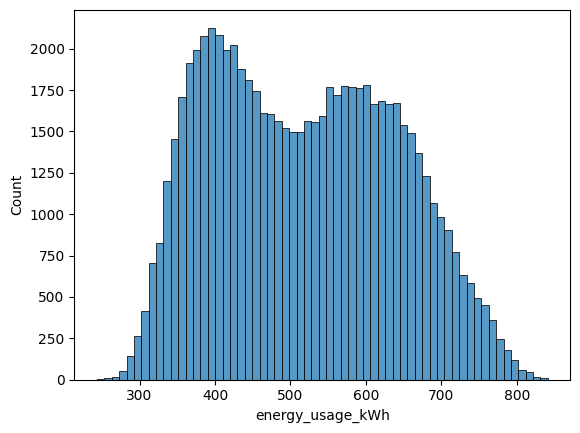

In [109]:
import seaborn as sns
sns.histplot(data['energy_usage_kWh'])

In [110]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d/%m/%Y %H:%M')
data['hour'] = data['timestamp'].dt.hour
data['weekday'] = data['timestamp'].dt.weekday
data['month'] = data['timestamp'].dt.month
data['is_peak_hour'] = data['hour'].isin([7, 8, 9, 17, 18, 19]).astype(int)

In [111]:
print(data.duplicated().sum())

0


In [112]:
#data = pd.get_dummies(data, columns=['region', 'weather_condition'], drop_first=True)

In [113]:
print(data.head())

            timestamp  region  temperature_C  energy_usage_kWh  humidity  \
0 2024-01-01 00:00:00  London          -4.01            524.06      68.4   
1 2024-01-01 01:00:00  London          -3.81            528.53      31.5   
2 2024-01-01 02:00:00  London          -3.08            536.06      46.5   
3 2024-01-01 03:00:00  London          -3.56            567.08      43.4   
4 2024-01-01 04:00:00  London          -2.56            545.50      74.2   

  weather_condition  hour  weekday  month  is_peak_hour  
0             Rainy     0        0      1             0  
1             Sunny     1        0      1             0  
2             Rainy     2        0      1             0  
3             Rainy     3        0      1             0  
4             Windy     4        0      1             0  


In [114]:
data.to_csv('preprocessed_energy_data.csv', index=False)

In [115]:
import matplotlib.pyplot as plt
data = pd.read_csv('preprocessed_energy_data.csv')

data.shape

(70272, 10)

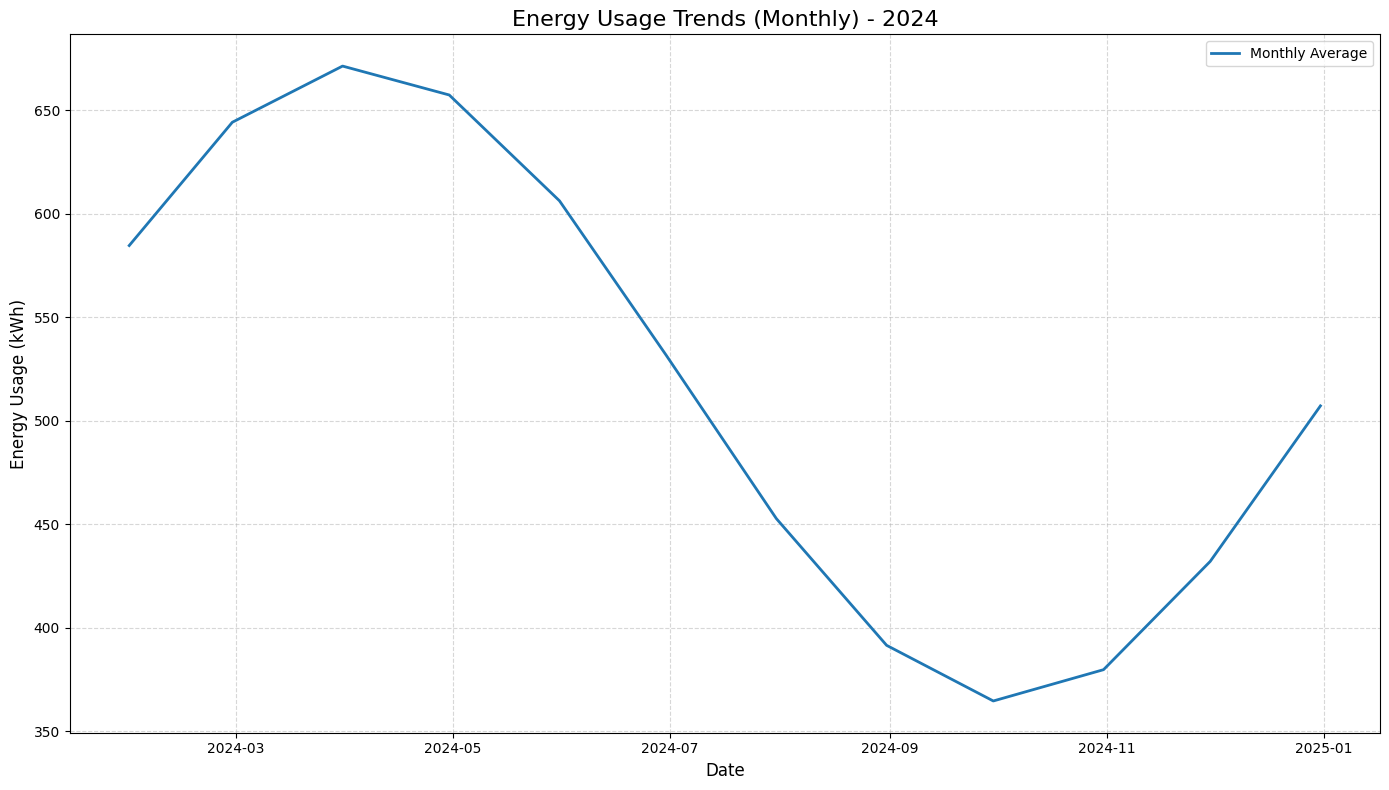

In [116]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.set_index('timestamp')

plt.figure(figsize=(14, 8))

# Monthly trend
monthly_avg = data['energy_usage_kWh'].resample('ME').mean()
plt.plot(monthly_avg.index, monthly_avg, label='Monthly Average', linewidth=2)

plt.title('Energy Usage Trends (Monthly) - 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy Usage (kWh)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
plt.close()

C:\Users\ahnaf\AppData\Local\Temp\ipykernel_10636\3921924483.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dow_mean = data.groupby('weekday_name')['energy_usage_kWh'].mean()


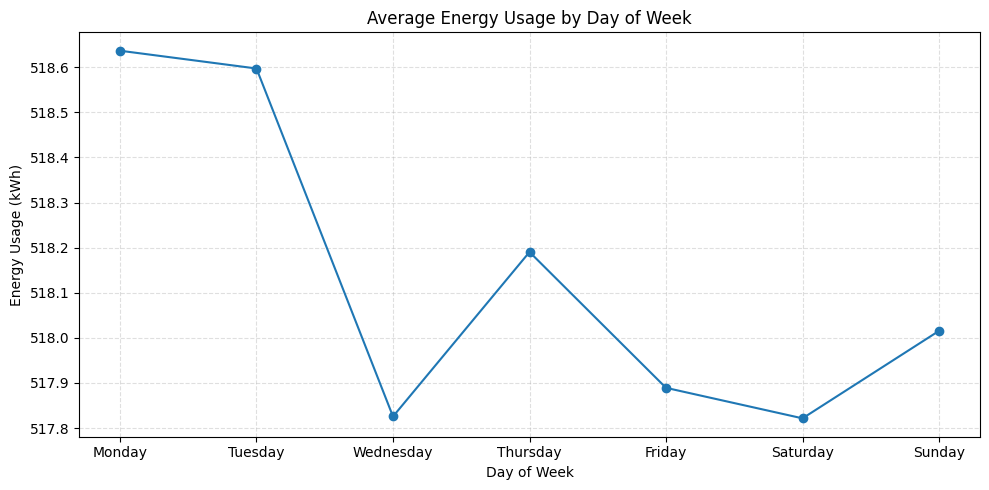

In [117]:
data = data.reset_index()
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['weekday_name'] = data['timestamp'].dt.day_name()

weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data['weekday_name'] = pd.Categorical(data['weekday_name'], categories=weekday_order, ordered=True)

# Mean energy by day of week
dow_mean = data.groupby('weekday_name')['energy_usage_kWh'].mean()

plt.figure(figsize=(10,5))
plt.plot(dow_mean.index, dow_mean.values, marker='o')
plt.title('Average Energy Usage by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Energy Usage (kWh)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

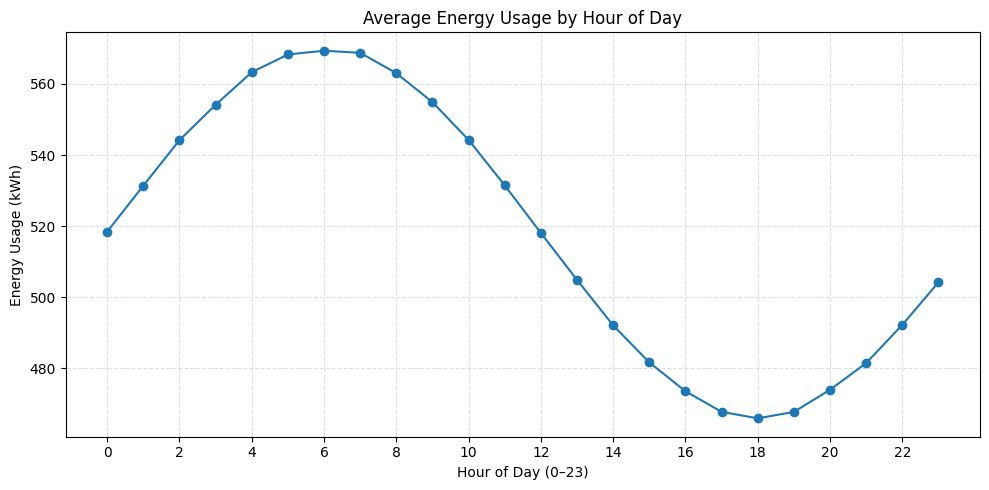

In [118]:
df = data.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour

hour_mean = df.groupby('hour')['energy_usage_kWh'].mean().reindex(range(24))

plt.figure(figsize=(10,5))
plt.plot(hour_mean.index, hour_mean.values, marker='o')
plt.title('Average Energy Usage by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Energy Usage (kWh)')
plt.xticks(range(0,24,2))
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

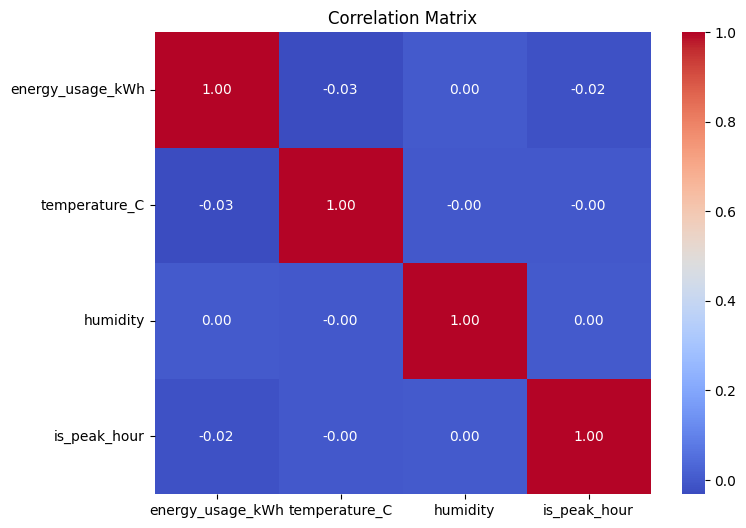

In [119]:
corr_cols = ['energy_usage_kWh', 'temperature_C', 'humidity', 'is_peak_hour']
corr = data[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

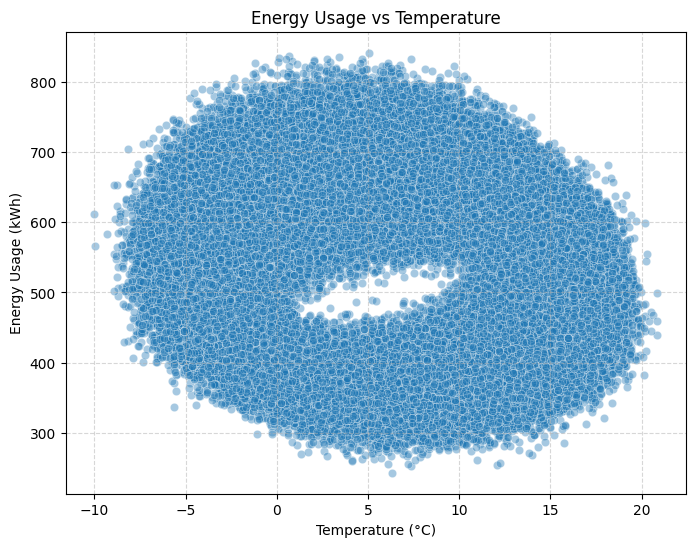

In [120]:
#Energy vs Temperature Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='temperature_C', y='energy_usage_kWh', data=data, alpha=0.4)
plt.title('Energy Usage vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Usage (kWh)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

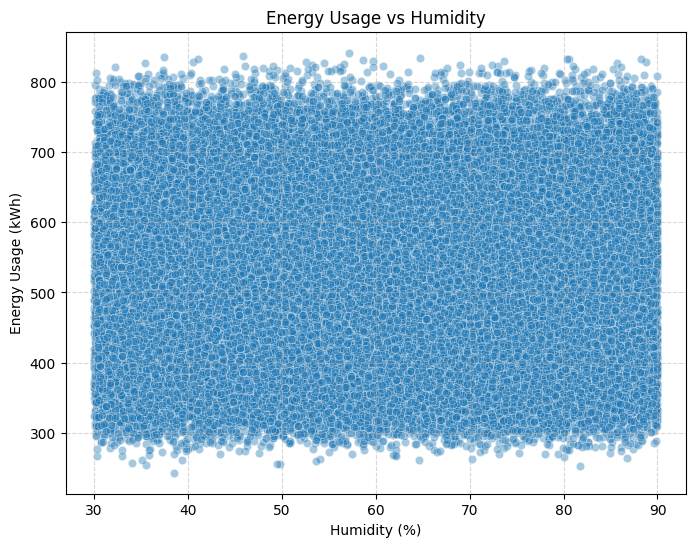

In [121]:
#Energy vs Humidity Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='humidity', y='energy_usage_kWh', data=data, alpha=0.4)
plt.title('Energy Usage vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Energy Usage (kWh)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

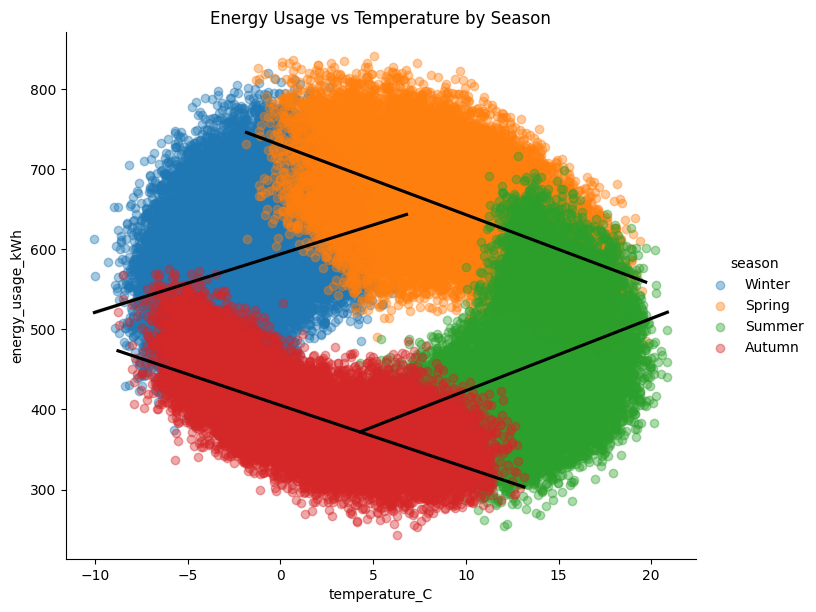

In [122]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data['season'] = data['month'].apply(get_season)

sns.lmplot(x='temperature_C', y='energy_usage_kWh', hue='season', data=data,
           height=6, aspect=1.2, scatter_kws={'alpha':0.4}, line_kws={'color':'black'})
plt.title('Energy Usage vs Temperature by Season')
plt.show()

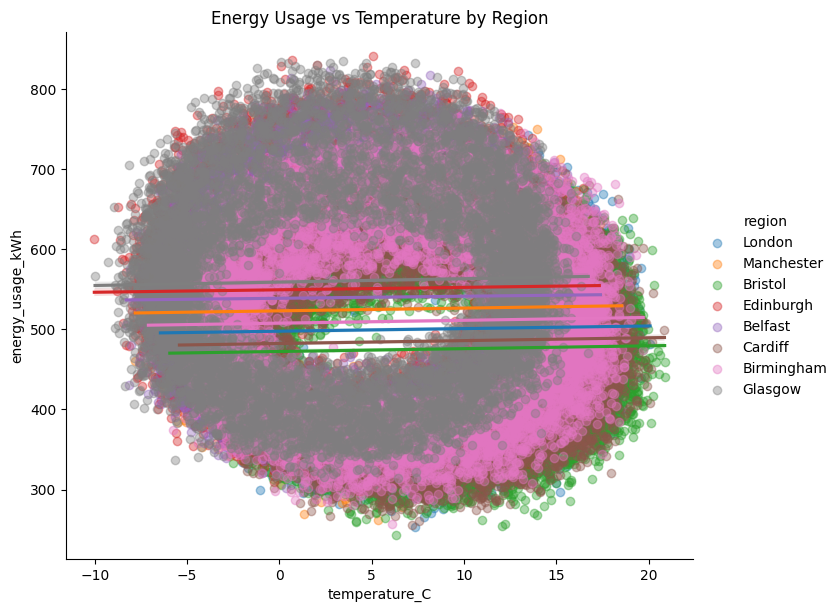

In [123]:
sns.lmplot(x='temperature_C', y='energy_usage_kWh', hue='region', data=data,
           height=6, aspect=1.2, scatter_kws={'alpha':0.4})
plt.title('Energy Usage vs Temperature by Region')
plt.show()

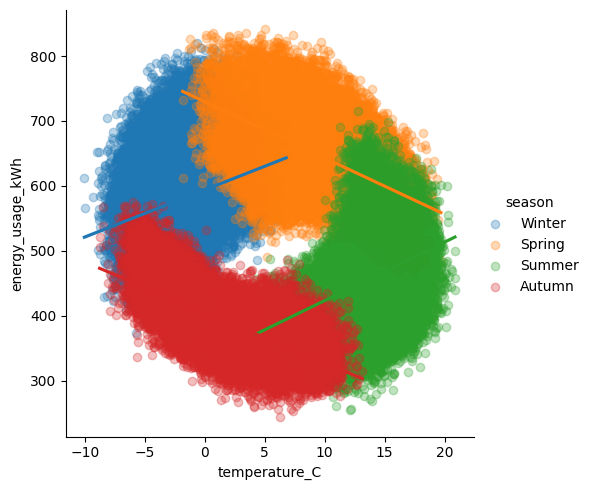

In [124]:
data['season'] = data['month'].map({12:'Winter',1:'Winter',2:'Winter',
                                    3:'Spring',4:'Spring',5:'Spring',
                                    6:'Summer',7:'Summer',8:'Summer',
                                    9:'Autumn',10:'Autumn',11:'Autumn'})

sns.lmplot(x='temperature_C', y='energy_usage_kWh', hue='season', data=data, scatter_kws={'alpha':0.3})

In [125]:
data

,timestamp,region,temperature_C,energy_usage_kWh,humidity,weather_condition,hour,weekday,month,is_peak_hour,weekday_name,season
0,2024-01-01 00:00:00,London,-4.01,524.06,68.4,Rainy,0,0,1,0,Monday,Winter
1,2024-01-01 01:00:00,London,-3.81,528.53,31.5,Sunny,1,0,1,0,Monday,Winter
2,2024-01-01 02:00:00,London,-3.08,536.06,46.5,Rainy,2,0,1,0,Monday,Winter
3,2024-01-01 03:00:00,London,-3.56,567.08,43.4,Rainy,3,0,1,0,Monday,Winter
4,2024-01-01 04:00:00,London,-2.56,545.50,74.2,Windy,4,0,1,0,Monday,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
70267,2024-12-31 19:00:00,Glasgow,-5.66,541.53,48.2,Cloudy,19,1,12,1,Tuesday,Winter
70268,2024-12-31 20:00:00,Glasgow,-8.77,564.67,85.1,Rainy,20,1,12,0,Tuesday,Winter
70269,2024-12-31 21:00:00,Glasgow,-5.78,551.70,58.8,Snowy,21,1,12,0,Tuesday,Winter
70270,2024-12-31 22:00:00,Glasgow,-4.63,546.15,78.0,Rainy,22,1,12,0,Tuesday,Winter


In [126]:
import pandas as pd
import numpy as np

data = pd.read_csv("UK_Energy_Usage_2024_with_Weather.csv")
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
data = data.dropna(subset=['timestamp']).copy()
data = data.sort_values(['region','timestamp']).reset_index(drop=True)

data['hour'] = data['timestamp'].dt.hour
data['weekday'] = data['timestamp'].dt.weekday
data['is_weekend'] = data['weekday'].isin([5,6]).astype(int)
data['month'] = data['timestamp'].dt.month
data['weekofyear'] = data['timestamp'].dt.isocalendar().week.astype(int)
data['is_peak_hour'] = data['hour'].isin([7,8,9,17,18,19]).astype(int)
data['season'] = data['month'].map({
    12:'Winter',1:'Winter',2:'Winter',
    3:'Spring',4:'Spring',5:'Spring',
    6:'Summer',7:'Summer',8:'Summer',
    9:'Autumn',10:'Autumn',11:'Autumn'
})
# Cyclical annual seasonality (smooth alternative to month/weekofyear)
data['dayofyear'] = data['timestamp'].dt.dayofyear
data['sin_doy'] = np.sin(2*np.pi*data['dayofyear']/365)
data['cos_doy'] = np.cos(2*np.pi*data['dayofyear']/365)

In [127]:
daily = (data.set_index('timestamp')
             .groupby('region')['energy_usage_kWh']
             .resample('D').mean().reset_index())

weekly = (data.set_index('timestamp')
              .groupby('region')['energy_usage_kWh']
              .resample('W').mean().reset_index())

monthly = (data.set_index('timestamp')
               .groupby('region')['energy_usage_kWh']
               .resample('M').mean().reset_index())

C:\Users\ahnaf\AppData\Local\Temp\ipykernel_10636\102788580.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M').mean().reset_index())


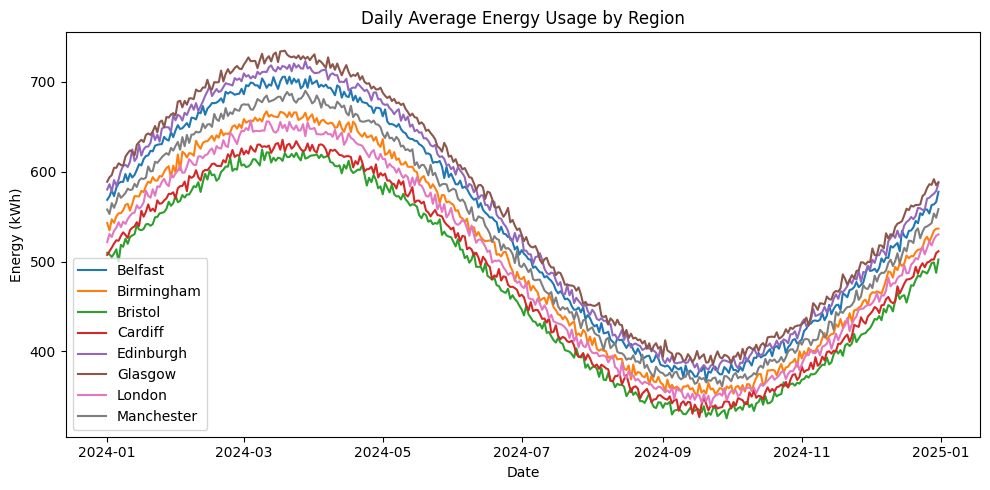

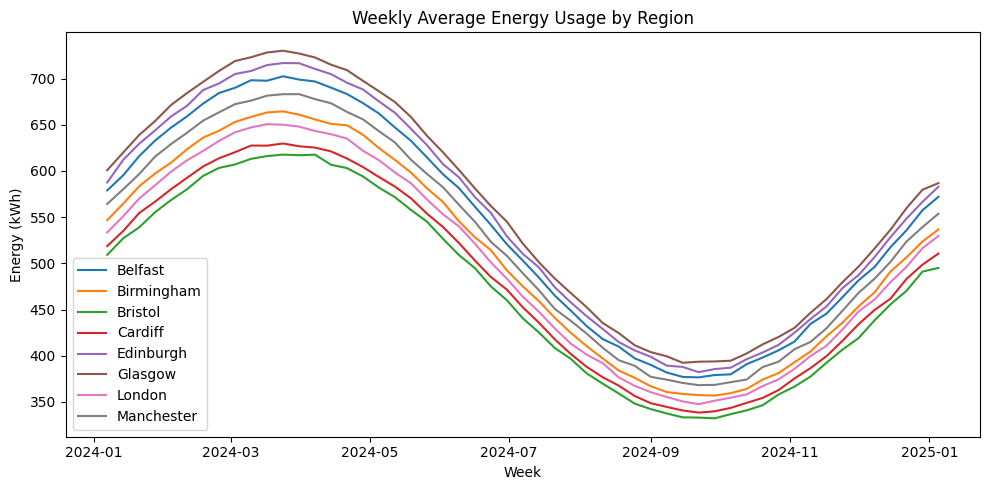

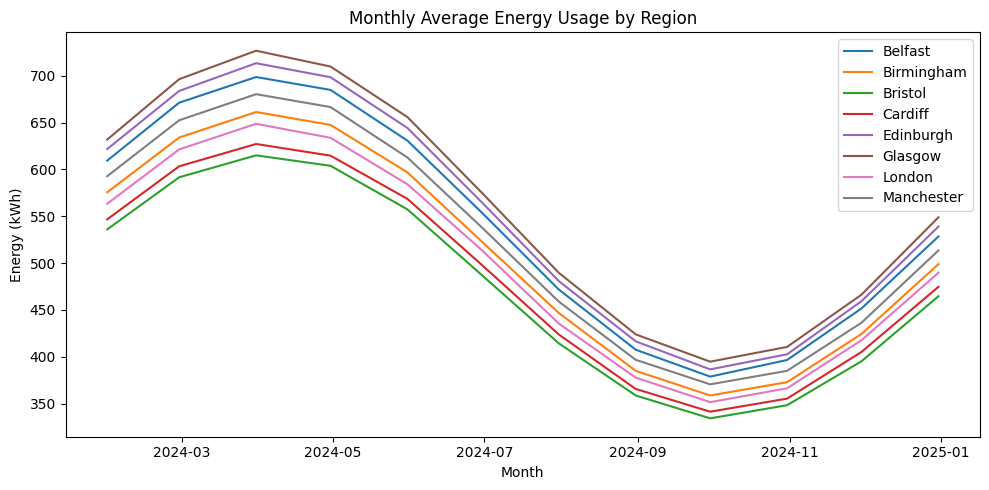

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for r in daily['region'].unique():
    d = daily[daily['region'] == r]
    plt.plot(d['timestamp'], d['energy_usage_kWh'], label=r)
plt.title("Daily Average Energy Usage by Region")
plt.xlabel("Date"); plt.ylabel("Energy (kWh)")
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
for r in weekly['region'].unique():
    w = weekly[weekly['region'] == r]
    plt.plot(w['timestamp'], w['energy_usage_kWh'], label=r)
plt.title("Weekly Average Energy Usage by Region")
plt.xlabel("Week"); plt.ylabel("Energy (kWh)")
plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
for r in monthly['region'].unique():
    m = monthly[monthly['region'] == r]
    plt.plot(m['timestamp'], m['energy_usage_kWh'], label=r)
plt.title("Monthly Average Energy Usage by Region")
plt.xlabel("Month"); plt.ylabel("Energy (kWh)")
plt.legend(); plt.tight_layout(); plt.show()

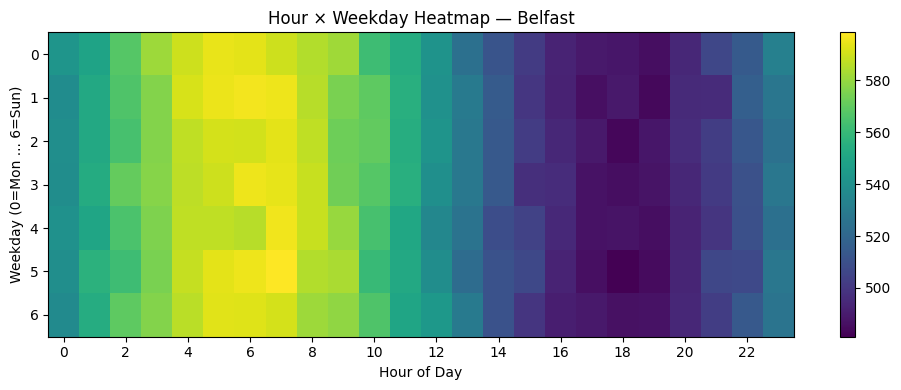

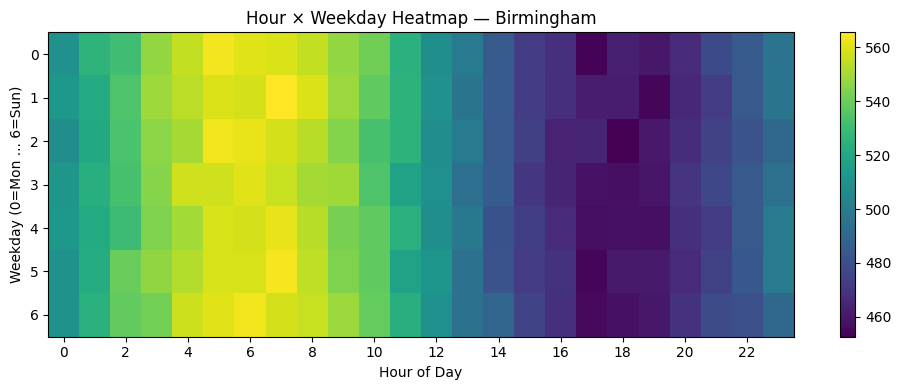

In [129]:
regions = list(data['region'].dropna().unique())
regions = regions[:2] if len(regions) >= 2 else regions

for reg in regions:
    g = data[data['region'] == reg].copy()
    pvt = g.pivot_table(index='weekday', columns='hour', values='energy_usage_kWh', aggfunc='mean')
    pvt = pvt.reindex(index=range(7), columns=range(24))
    plt.figure(figsize=(10,4))
    plt.imshow(pvt.values, aspect='auto')
    plt.title(f"Hour × Weekday Heatmap — {reg}")
    plt.xlabel("Hour of Day"); plt.ylabel("Weekday (0=Mon ... 6=Sun)")
    plt.xticks(ticks=range(0,24,2), labels=[str(h) for h in range(0,24,2)])
    plt.yticks(ticks=range(7), labels=[str(d) for d in range(7)])
    plt.colorbar(); plt.tight_layout(); plt.show()

In [130]:
num_cols = [
    'energy_usage_kWh', 'temperature_C', 'humidity',
    'hour', 'weekday', 'is_weekend', 'month', 'weekofyear', 'is_peak_hour',
    'energy_lag_1', 'energy_lag_24', 'energy_lag_168',
    'energy_ma_24', 'temp_ma_24', 'temp_anomaly'
]
num_cols = [c for c in num_cols if c in data.columns]
pearson_corr  = data[num_cols].corr(method='pearson').round(3)
spearman_corr = data[num_cols].corr(method='spearman').round(3)
pearson_corr, spearman_corr

(                  energy_usage_kWh  temperature_C  humidity   hour  weekday  \
 energy_usage_kWh             1.000         -0.032     0.004 -0.234   -0.002   
 temperature_C               -0.032          1.000    -0.002 -0.000    0.009   
 humidity                     0.004         -0.002     1.000  0.001   -0.008   
 hour                        -0.234         -0.000     0.001  1.000   -0.000   
 weekday                     -0.002          0.009    -0.008 -0.000    1.000   
 is_weekend                  -0.001          0.004    -0.005  0.000    0.791   
 month                       -0.692         -0.156    -0.003  0.000    0.006   
 weekofyear                  -0.695         -0.132    -0.005  0.000    0.011   
 is_peak_hour                -0.016         -0.000     0.003  0.125    0.000   
 
                   is_weekend  month  weekofyear  is_peak_hour  
 energy_usage_kWh      -0.001 -0.692      -0.695        -0.016  
 temperature_C          0.004 -0.156      -0.132        -0.000  
 hu

In [131]:
for lag in [1, 24, 168]:   # 1h, 24h, 7d
    data[f'energy_lag_{lag}'] = data.groupby('region')['energy_usage_kWh'].shift(lag)

data['energy_ma_24'] = data.groupby('region')['energy_usage_kWh'].transform(
    lambda x: x.rolling(24, min_periods=12).mean()
)
data['temp_ma_24'] = data.groupby('region')['temperature_C'].transform(
    lambda x: x.rolling(24, min_periods=12).mean()
)
data['temp_week_ma_168'] = data.groupby('region')['temperature_C'].transform(
    lambda x: x.rolling(168, min_periods=24).mean()
)
data['temp_anomaly'] = data['temperature_C'] - data['temp_week_ma_168']

lag_cols = ['energy_lag_1','energy_lag_24','energy_lag_168','energy_ma_24','temp_ma_24','temp_anomaly']
  
ml_data = pd.get_dummies(
    data.copy(),
    columns=['weather_condition','region','season'],
    drop_first=True
)

drop_cols = ['timestamp','region','season','weather_condition','month','weekofyear']

target = 'energy_usage_kWh'
X_train = ml_data.loc[train.index].drop(columns=[target] + drop_cols, errors='ignore')
y_train = train[target]
X_test  = ml_data.loc[test.index].drop(columns=[target] + drop_cols, errors='ignore')
y_test  = test[target]

# Drop NaNs from lag features
train_mask = X_train.notna().all(axis=1)
X_train_clean, y_train_clean = X_train[train_mask], y_train[train_mask]

test_mask = X_test.notna().all(axis=1)
X_test_clean, y_test_clean = X_test[test_mask], y_test[test_mask]

print("Train shape:", X_train_clean.shape, "| Test shape:", X_test_clean.shape)

NameError: name 'train' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=12,
    min_samples_leaf=20,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train_clean, y_train_clean)
rf_pred = rf.predict(X_test_clean)

mse = mean_squared_error(y_test_clean, rf_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test_clean, rf_pred)
r2   = r2_score(y_test_clean, rf_pred)

print(f"Tuned RandomForest: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.3f}")

fi = pd.DataFrame({
    "feature": X_test_clean.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False).head(15)

plt.figure(figsize=(8,5))
plt.barh(fi['feature'][::-1], fi['importance'][::-1])
plt.title("RandomForest (Tuned) — Top 15 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()